# 보스턴 집값 예측

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [264]:
# 파일 불러오기

data = pd.read_csv('../../Data/boston.csv')

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [266]:
#boston_df = data.fillna(data.min())
boston_df = data

In [267]:
# boston_df_cleaned = boston_df.dropna()
# print(f"원본 데이터 크기: {boston_df.shape}")
# print(f"결측치 제거 후 데이터 크기: {boston_df_cleaned.shape}")

In [268]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [269]:
print(type(boston_df))

<class 'pandas.core.frame.DataFrame'>


In [270]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# [독립변수 분석]
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)
- 각 컬럼별로 주택가격에 미치는 영향도를 조사

2D , 1D


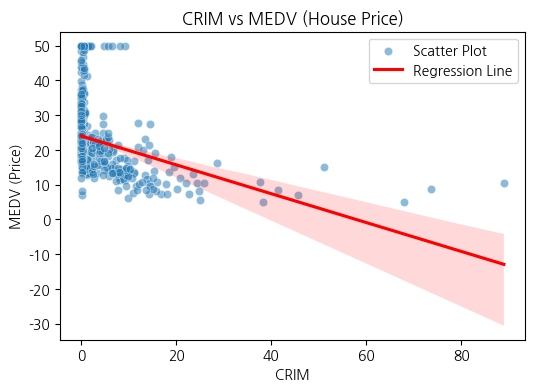

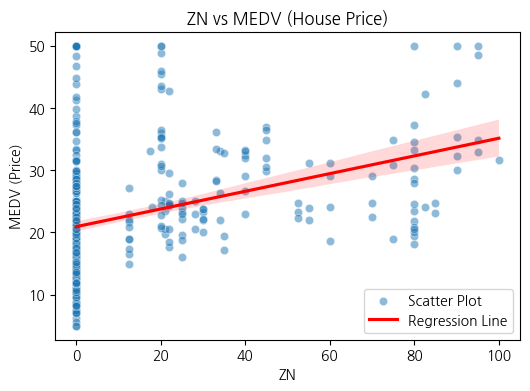

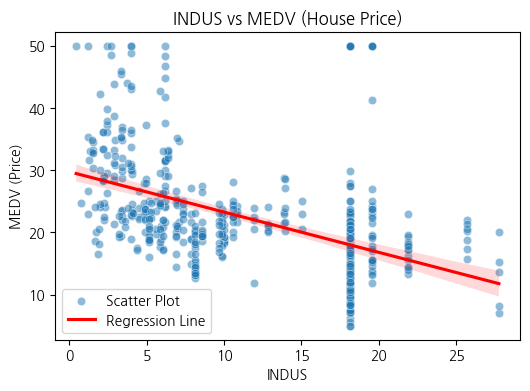

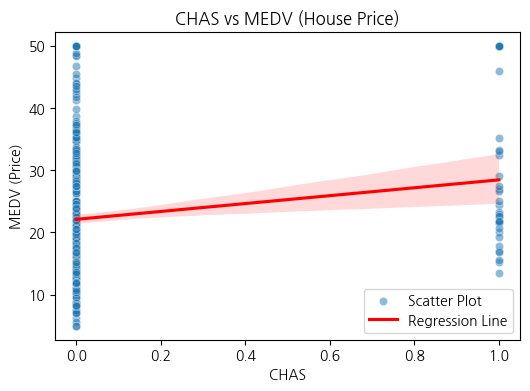

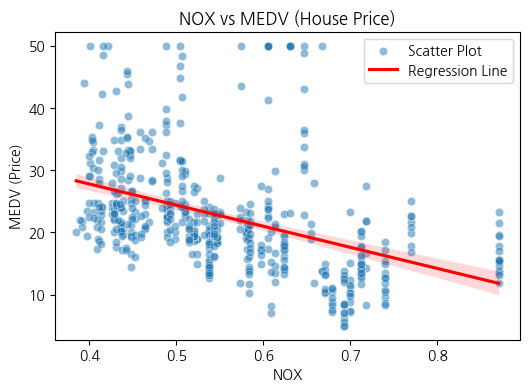

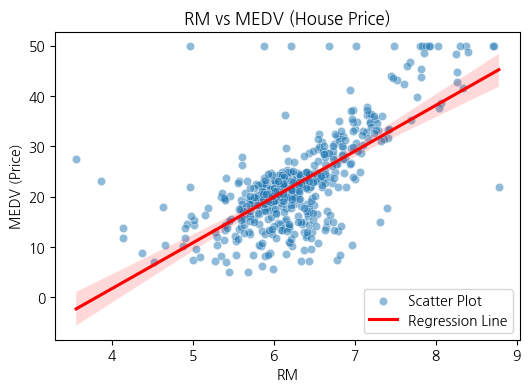

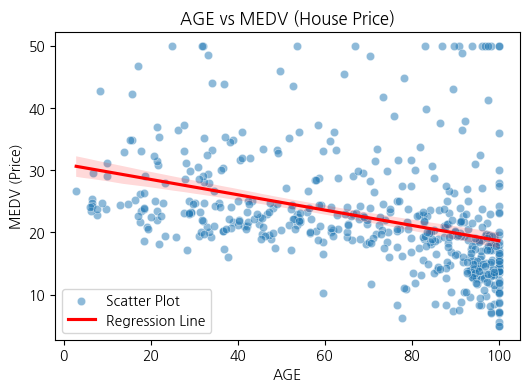

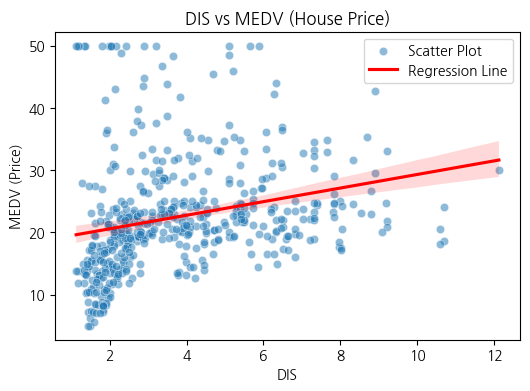

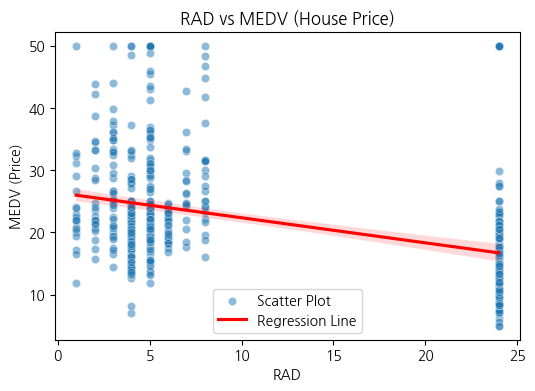

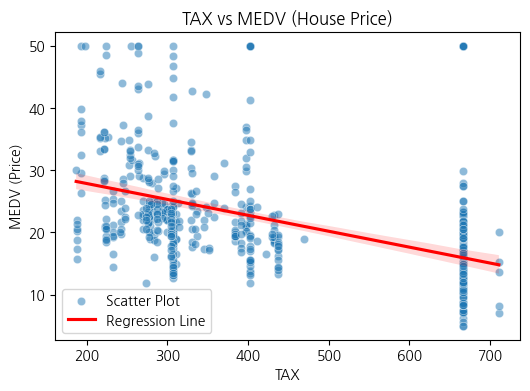

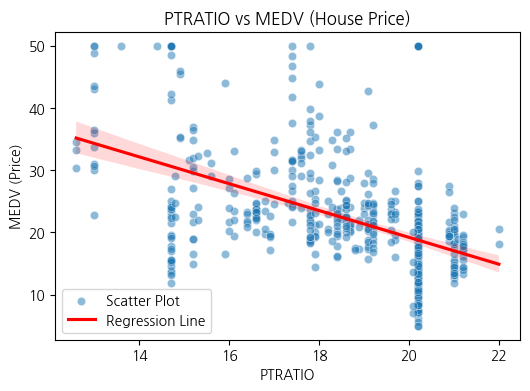

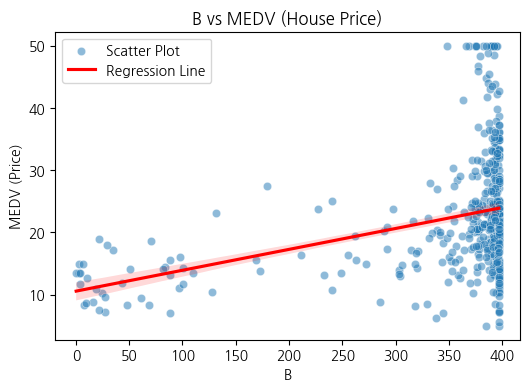

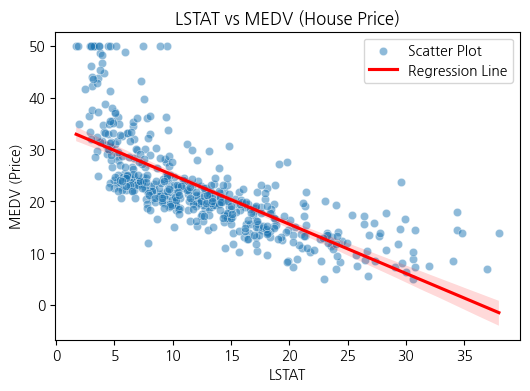

In [271]:
# 학습용 데이터 셋 시각화 분석 

feature_DF = boston_df.iloc[:,:-1]
target_DF = boston_df.iloc[:, -1]

print(f'{feature_DF.ndim}D , {target_DF.ndim}D')

# 모든 Feature에 대해 MEDV(Target)과의 관계를 시각화
for i in feature_DF.columns:
    plt.figure(figsize=(6, 4))  # 개별 그래프 크기 설정

    # 산점도 (Feature vs Target)
    sns.scatterplot(x=feature_DF[i], y=target_DF, alpha=0.5, label="Scatter Plot")

    # 선형 회귀선 추가 (트렌드 확인용)
    sns.regplot(x=feature_DF[i], y=target_DF, scatter=False, color="red", label="Regression Line")

    # 그래프 제목 및 라벨
    plt.title(f'{i} vs MEDV (House Price)')
    plt.xlabel(i)
    plt.ylabel("MEDV (Price)")
    plt.legend()

    # 그래프 출력
    plt.show()


In [272]:
feature_DF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [273]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Feature 개수 확인
# num_features = len(feature_DF.columns)

# # 행(row)과 열(column) 개수 설정 (예: 3열로 배치)
# cols = 3
# rows = (num_features // cols) + (num_features % cols > 0)  # 전체 Feature 개수를 고려한 행 개수 설정

# # 서브플롯 생성
# fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # 화면 크기 조정
# fig.suptitle("Feature vs MEDV (House Price)", fontsize=16)  # 전체 제목

# # 모든 Feature에 대해 반복 실행
# for idx, i in enumerate(feature_DF.columns):
#     row = idx // cols  # 현재 행 위치
#     col = idx % cols  # 현재 열 위치
#     ax = axes[row, col] if rows > 1 else axes[col]  # 서브플롯 선택

#     # 산점도 (Feature vs Target)
#     sns.scatterplot(x=feature_DF[i], y=target_DF, alpha=0.5, ax=ax, label="Scatter Plot")

#     # 선형 회귀선 추가 (트렌드 확인용)
#     sns.regplot(x=feature_DF[i], y=target_DF, scatter=False, color="red", ax=ax, label="Regression Line")

#     # 그래프 제목 및 라벨
#     ax.set_title(f'{i} vs MEDV')
#     ax.set_xlabel(i)
#     ax.set_ylabel("MEDV")
#     ax.legend()

# # 서브플롯 간격 조정
# plt.tight_layout(rect=[0, 0, 1, 0.96])  # 전체 제목과 겹치지 않도록 조정
# plt.show()


In [274]:
correlation_matrix = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']].corr()
#print(correlation_matrix)

# MEDV와 각 Feature의 상관계수만 출력 # 절댓값 기준 내림차순 정렬 (강한 상관관계를 쉽게 확인)
medv_correlation = correlation_matrix['MEDV'].abs().sort_values(ascending=False)
print(medv_correlation)

# 데이터셋 선변 'LSTAT','RM','PTRATIO','INDUS','TAX'

feature_DF_setting = boston_df[['LSTAT','RM','PTRATIO','INDUS']]

# LSTAT      0.737663
# RM         0.695360
# PTRATIO    0.507787
# INDUS      0.483725
# TAX        0.468536


# 학습

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(feature_DF, target_DF, test_size=0.2, random_state=156)
#X_train, X_test, y_train, y_test = train_test_split(feature_DF, target_DF, test_size=0.3, random_state=156)
# 모델선정
lr_model = LinearRegression()

# 학습

lr_model.fit(X_train,y_train)



MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


LinearRegression()

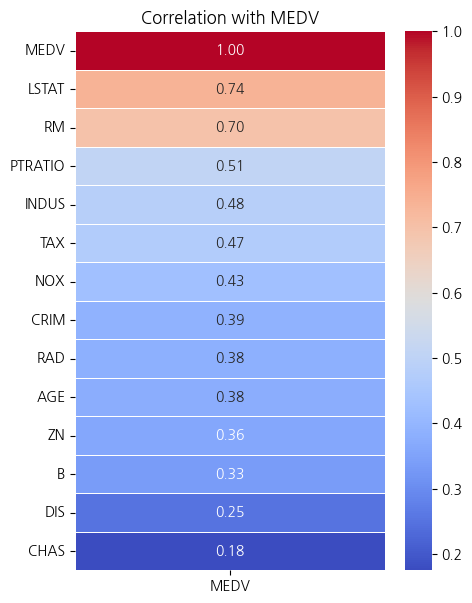

In [275]:

# 히트맵으로 시각화
plt.figure(figsize=(5, 7))
sns.heatmap(medv_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with MEDV")
plt.show()

In [276]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error
# 모델 데이터 검증


y_pred = lr_model.predict(X_test)

score = lr_model.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print(f'예측값 : {y_pred}')
print(f'모델 score : {score}')
print(f'제곱 mse : {mse}')
print(f'절대값 mae : {mae}')
print(f'루트제곱 rmse : {rmse}')


예측값 : [22.79706486 19.52568184 35.73324434 19.61957154 31.78013286 17.73680252
 30.15961876 17.5567899  10.45223496 12.97985216 20.92666726 16.82816187
 28.52686276 36.71178753 23.45323755 24.35337698 13.03478709 11.68948081
 29.92212393 23.22561125 22.30715723 17.24483561 20.95977272 16.87598258
 33.38686889  6.60263103 13.60493669 19.04791306 13.52478291  8.80909846
 29.15972238 11.95464962 19.73593445 23.69074047 16.16137573 13.25627305
 13.94184469 17.29789586 17.0617094  23.71662003 32.83803734  9.53131928
 18.62225131 -4.32613086 19.88794994 21.24846248 24.35329633 34.9816951
 20.65656495 27.98567552 32.39569975 40.31175765 40.45891845 19.5392662
 24.89439837 24.145643   19.65804188 33.14860042 23.5764952  15.32190168
 22.64723315 25.91067178 23.9704429   8.40026141 21.54036059 39.01934432
 32.78261126 29.86223559 14.44531312 23.28741692 13.89458507 31.9949086
 36.30329413 27.29365771 20.71382784 29.94481638 20.79706079 26.54001515
 22.94128158 18.29254791 30.28086092 17.60381344